The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as spam or ham.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

## Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
email_data = pd.read_csv('Spam.txt', sep=',', header=None)

In [10]:
print(email_data.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


As of now, the columns are named as integers. Let's manually name the columns appropriately (column names are available at the UCI website here: https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names)

In [11]:
email_data.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]
print(email_data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [13]:
#email_data.head()

In [14]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [17]:
# there are no missing values in the dataset 
email_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Let's also look at the fraction of spam and ham emails in the dataset.

In [18]:
email_data['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [19]:
email_data['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [20]:
# its is balanced data set

In [21]:
#Data Preparation

In [22]:
email_data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [23]:
email_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [24]:
# as we can see we need to scale our variable

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = email_data.drop('spam', axis=1)

In [27]:
y = email_data['spam'].values.astype(int)

In [32]:
# scaling the features
# note that the scale function standardises each column, i.e.
# x = x-mean(x)/std(x)

from sklearn.preprocessing import scale
X = scale(X)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [38]:
# confirm that splitting also has similar distribution of spam and ham 
# emails
print(y_train.mean())
print(y_test.mean())

0.3978260869565217
0.38522809558291093


In [39]:
from sklearn.svm import SVC 

In [41]:
sv1 = SVC(C=1.0)

In [43]:
sv1.fit(X_train, y_train)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = sv1.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [46]:
print(accuracy_score(y_test, y_pred))

0.9283128167994207


In [47]:
print(confusion_matrix(y_test, y_pred))

[[811  38]
 [ 61 471]]


In [52]:
# precision
print("precision", precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", recall_score(y_test, y_pred))


precision 0.925343811394892
recall 0.8853383458646616


In [53]:
# specificity (% of hams correctly classified)
print("specificity", 811/(811+38))

specificity 0.9552414605418139


Interpretation of Results¶

In the confusion matrix, the elements at (0, 0) and (1,1) correspond to the more frequently occurring class, i.e. ham emails. Thus, it implies that:

92% of all emails are classified correctly
88.5% of spams are identified correctly (sensitivity/recall)
Specificity, or % of hams classified correctly, is 95%

# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import KFold, cross_val_score

In [60]:
fold = KFold(n_splits=5, shuffle=True, random_state=4)

In [61]:
model = SVC(C=1.0)

In [68]:
score = cross_val_score(model, X_train, y_train, cv=fold, n_jobs=-1, verbose=1, scoring='accuracy')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [64]:
score

array([0.91770186, 0.93944099, 0.91925466, 0.93012422, 0.94254658])

In [70]:
score.mean()

0.9298136645962731

## Grid Search to Find Optimal Hyperparameter C

K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

But we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [71]:
from sklearn.model_selection import GridSearchCV

In [94]:
hyper_param = {'C':[0.1, 1, 5, 10, 100, 1000, 1000]}

In [95]:
svm2 = SVC()

In [96]:
grid_search = GridSearchCV(svm2, param_grid=hyper_param, cv=fold, n_jobs=-1, verbose=2, return_train_score=True)

In [97]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    9.9s finished
c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 5, 10, 100, 1000, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [98]:
grid_result = pd.DataFrame(grid_search.cv_results_)

In [99]:
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.775004,0.021195,0.134377,0.018751,0.1,{'C': 0.1},0.895963,0.900621,0.906832,0.902174,...,0.905280,0.008505,7,0.912267,0.911491,0.912267,0.911491,0.906056,0.910714,0.002355
1,0.493756,0.023385,0.068752,0.007655,1,{'C': 1},0.917702,0.939441,0.919255,0.930124,...,0.929814,0.010130,3,0.951863,0.945652,0.950699,0.946040,0.943711,0.947593,0.003135
2,0.409378,0.011693,0.065087,0.005170,5,{'C': 5},0.909938,0.948758,0.931677,0.928571,...,0.931677,0.012917,1,0.966615,0.967391,0.968168,0.963509,0.962733,0.965683,0.002163
3,0.399464,0.024330,0.056249,0.007655,10,{'C': 10},0.909938,0.944099,0.933230,0.928571,...,0.931056,0.011809,2,0.973991,0.970497,0.973602,0.968944,0.970885,0.971584,0.001924
4,0.506256,0.050968,0.046876,0.000002,100,{'C': 100},0.914596,0.925466,0.936335,0.930124,...,0.928571,0.008098,4,0.989519,0.989519,0.989907,0.988354,0.988354,0.989130,0.000650
5,0.634384,0.075649,0.046875,0.000002,1000,{'C': 1000},0.908385,0.931677,0.923913,0.919255,...,0.920497,0.007569,5,0.996118,0.993789,0.994177,0.993789,0.993789,0.994332,0.000905
6,0.603132,0.062969,0.040627,0.007654,1000,{'C': 1000},0.908385,0.931677,0.923913,0.919255,...,0.920497,0.007569,5,0.996118,0.993789,0.994177,0.993789,0.993789,0.994332,0.000905


In [100]:
# let plot the result

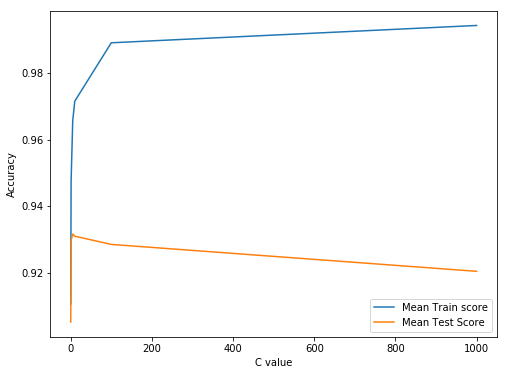

In [101]:
plt.figure(figsize=(8,6))
plt.plot(grid_result['param_C'],grid_result['mean_train_score'])
plt.plot(grid_result['param_C'], grid_result['mean_test_score'])
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['Mean Train score', 'Mean Test Score'], loc='best')

Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data). 

In [102]:
best_C_value = grid_search.best_params_

In [103]:
best_C_value

{'C': 5}

In [104]:
print('best score is {0} and best C value is {1} '.format(grid_search.best_score_, best_C_value))

best score is 0.9316770186335404 and best C value is {'C': 5} 


In [105]:
# lests bulid model with c=5

In [106]:
svm3 = SVC(C=5)

In [107]:
svm3.fit(X_train, y_train)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [108]:
y_pred = svm3.predict(X_test)

In [110]:
# metrics
# print other metrics

# accuracy
print("accuracy", accuracy_score(y_test, y_pred))

# precision
print("precision", precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", recall_score(y_test, y_pred))

accuracy 0.9326574945691528
precision 0.9262135922330097
recall 0.8966165413533834


## Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if you are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.

In [112]:
hyper_param = {'C':[0.1, 1, 5, 10, 100, 1000]}

In [114]:
score = ['accuracy', 'precision', 'recall']

In [123]:
for i in score:
    
    grid_search2 = GridSearchCV(SVC(gamma='auto'), param_grid=hyper_param, scoring=i, n_jobs=-1, 
                            cv=fold, return_train_score=True)
    grid_search2.fit(X_train, y_train)
    print('Best {0} is {1} with C = {2}'.format(i, grid_search2.best_score_, grid_search2.best_params_))

Best accuracy is 0.9316770186335404 with C = {'C': 5}
Best precision is 0.936509856470386 with C = {'C': 0.1}
Best recall is 0.8995037658392363 with C = {'C': 5}
